<a href="https://colab.research.google.com/github/ritwiks9635/CNN_Project_File/blob/main/Vagitable__Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vagitable🍆🥑🥬🥒🍅🍍 Classification 🥦🥬🥒🌶🍅🍎

In [ ]:
! unzip /content/https:/www.kaggle.com/datasets/misrakahmed/vegetable-image-dataset/vegetable-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Vegetable Images/train/Papaya/0017.jpg  
  inflating: Vegetable Images/train/Papaya/0018.jpg  
  inflating: Vegetable Images/train/Papaya/0019.jpg  
  inflating: Vegetable Images/train/Papaya/0020.jpg  
  inflating: Vegetable Images/train/Papaya/0021.jpg  
  inflating: Vegetable Images/train/Papaya/0022.jpg  
  inflating: Vegetable Images/train/Papaya/0023.jpg  
  inflating: Vegetable Images/train/Papaya/0024.jpg  
  inflating: Vegetable Images/train/Papaya/0025.jpg  
  inflating: Vegetable Images/train/Papaya/0026.jpg  
  inflating: Vegetable Images/train/Papaya/0027.jpg  
  inflating: Vegetable Images/train/Papaya/0028.jpg  
  inflating: Vegetable Images/train/Papaya/0029.jpg  
  inflating: Vegetable Images/train/Papaya/0030.jpg  
  inflating: Vegetable Images/train/Papaya/0031.jpg  
  inflating: Vegetable Images/train/Papaya/0032.jpg  
  inflating: Vegetable Images/train/Papaya/0033.jpg  
  inflating: Vegetable Images/t

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from PIL import ImageEnhance
from skimage.io import imread
import matplotlib.pyplot as plt

import os, random, pathlib, warnings, itertools, math
warnings.filterwarnings("ignore")

In [ ]:
path = "/content/Vegetable Images"
train_data = os.path.join(path, "train")
test_data = os.path.join(path, "test")
val_data = os.path.join(path, "validation")

In [ ]:
os.listdir(train_data)

In [ ]:
def folders(dir):
  for path in pathlib.Path(dir).iterdir():
    if path.is_dir():
      print("There are " + str(len([name for name in os.listdir(path) \
            if os.path.isfile(os.path.join(path, name))])) + " files in " + \
            str(path.name))

In [ ]:
folders(os.path.join(val_data))

In [ ]:
img_folder = "Bitter_Gourd"
num_img = 2
def preprocess_img():
  j = 1
  for x in range(num_img):
    files = os.path.join(test_data, img_folder)
    rand = random.choice(os.listdir(files))
    img = Image.open(os.path.join(files, rand))
    img_c = img.copy()

    plt.figure(figsize=(10,10))
    plt.subplot(2,2,j)
    plt.title("original")
    plt.imshow(img)
    j += 1

    img1=ImageEnhance.Color(img_c).enhance(1.35)
    img1=ImageEnhance.Contrast(img1).enhance(1.45)
    img1=ImageEnhance.Sharpness(img1).enhance(2.5)

    plt.subplot(2,2,j)
    plt.title("process")
    plt.imshow(img1)
    j += 1

In [ ]:
preprocess_img()

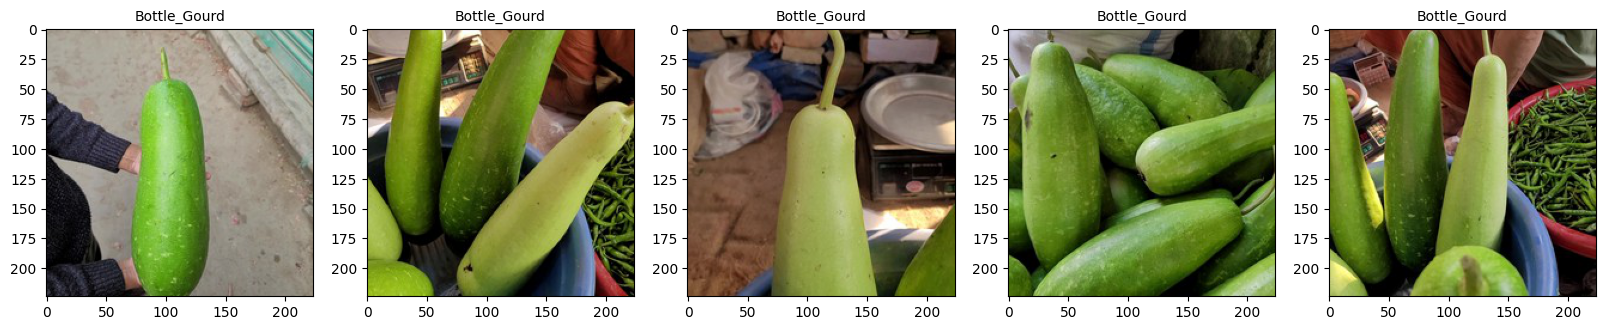

In [ ]:
folders = os.path.join(train_data, "Bottle_Gourd")
plt.figure(figsize=(20,10))
for i, j, in enumerate(os.listdir(folders)):
  img = plt.imread(os.path.join(folders, j))
  plt.subplot(1,5, i+1)
  plt.title("Bottle_Gourd", size = 10)
  plt.imshow(img)

  if i == 5-1:
    break

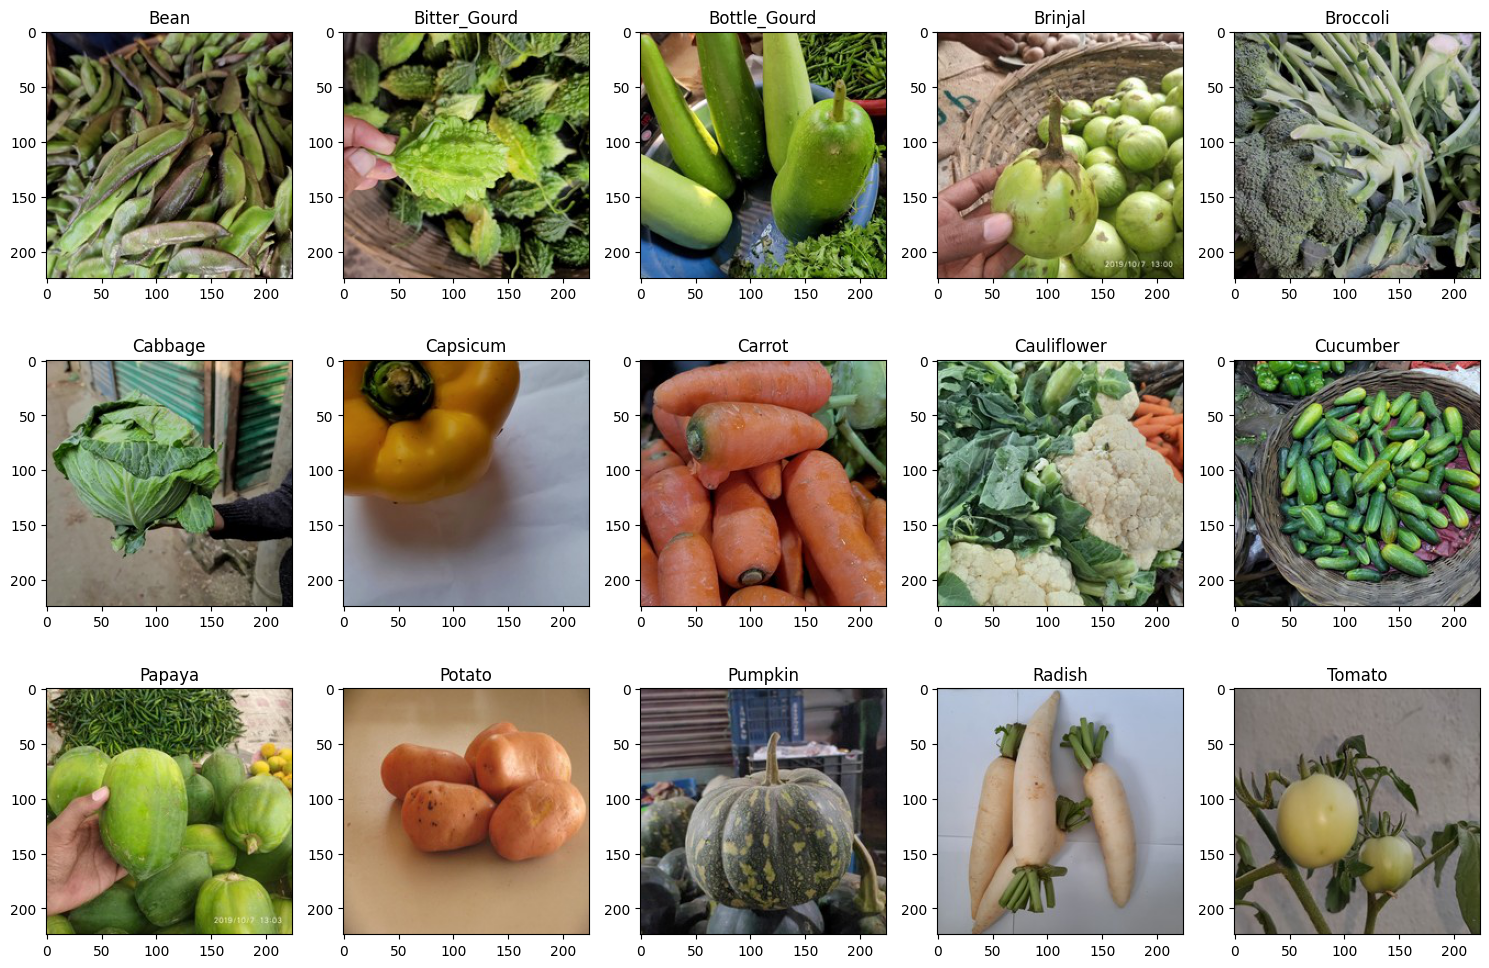

In [ ]:
imgs = []
for foods in sorted(os.listdir(train_data)):
  foods_item = os.listdir(train_data + "/" + foods)
  rand = np.random.choice(foods_item)
  imgs.append(os.path.join(train_data, foods, rand))

plt.figure(figsize=(15, 10))
for x, img in enumerate(imgs):
  category = img.split('/')[-2]
  imgs = plt.imread(img)

  plt.subplot(3,5,x+1)
  plt.title(category)
  plt.imshow(imgs)
plt.tight_layout()

In [ ]:
imgs.shape

(224, 224, 3)

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(rescale = 1./255.,
    zoom_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True)
test_gen = ImageDataGenerator(rescale = 1./255.)

In [ ]:
train_set = train_gen.flow_from_directory(train_data,
    target_size=(224,224),
    batch_size = 64,
    class_mode = "categorical")
val_set = test_gen.flow_from_directory(val_data,
    target_size=(224,224),
    batch_size = 64,
    class_mode = "categorical")
test_set = test_gen.flow_from_directory(test_data,
    target_size=(224,224),
    batch_size = 64,
    class_mode = "categorical")

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [ ]:
classes = train_set.class_indices
classes

{'Bean': 0,
 'Bitter_Gourd': 1,
 'Bottle_Gourd': 2,
 'Brinjal': 3,
 'Broccoli': 4,
 'Cabbage': 5,
 'Capsicum': 6,
 'Carrot': 7,
 'Cauliflower': 8,
 'Cucumber': 9,
 'Papaya': 10,
 'Potato': 11,
 'Pumpkin': 12,
 'Radish': 13,
 'Tomato': 14}

In [ ]:
img_shape = [224,224]
inception = keras.applications.inception_v3.InceptionV3(input_shape = img_shape + [3], weights = "imagenet", include_top=False)
for layer in inception.layers:
  layer.trainable = False

In [ ]:
x = inception.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(128, activation = "relu")(x)
x = keras.layers.Dropout(0.2)(x)
output = keras.layers.Dense(15, activation = "softmax")(x)
model = keras.models.Model(inputs = inception.input, outputs = output)

In [ ]:
model.compile(optimizer = "adam", loss = "categorical_crosaentropy", metrics = ["accuracy"])

In [26]:
history = model.fit(train_set, validation_data = val_set, epochs = 5, steps_per_epoch = len(train_set), validation_steps = len(val_set))

Epoch 1/5
235/235 [==============================] - 232s 986ms/step - loss: 0.0276 - accuracy: 0.9913 - val_loss: 0.0173 - val_accuracy: 0.9937
Epoch 2/5
235/235 [==============================] - 225s 952ms/step - loss: 0.0308 - accuracy: 0.9897 - val_loss: 0.0234 - val_accuracy: 0.9910
Epoch 3/5
235/235 [==============================] - 230s 979ms/step - loss: 0.0234 - accuracy: 0.9927 - val_loss: 0.0201 - val_accuracy: 0.9930
Epoch 4/5
235/235 [==============================] - 222s 946ms/step - loss: 0.0225 - accuracy: 0.9926 - val_loss: 0.0375 - val_accuracy: 0.9870
Epoch 5/5
235/235 [==============================] - 206s 878ms/step - loss: 0.0300 - accuracy: 0.9895 - val_loss: 0.0253 - val_accuracy: 0.9937


In [27]:
def plot_accuracy(history):
  plt.plot(history.history["accuracy"], label = "train accuracy")
  plt.plot(history.history["val_accuracy"], label = "validation accuracy")
  plt.title("Model Accuracy")
  plt.xlabel("Epochs")
  plt.legend()
  plt.show()

def plot_loss(history):
  plt.plot(history.history["loss"], label = "train loss")
  plt.plot(history.history["val_loss"], label = "validation loss")
  plt.title("Model Loss")
  plt.xlabel("Epochs")
  plt.legend()
  plt.show()

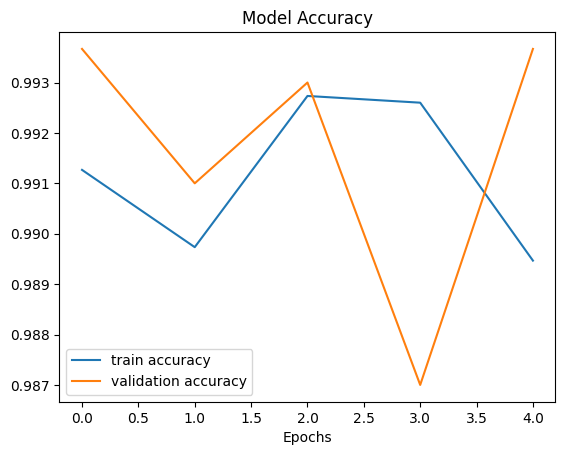

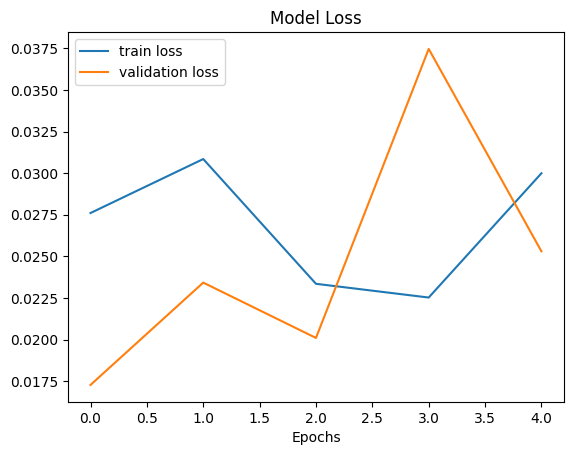

In [28]:
plot_accuracy(history)
plot_loss(history)

In [45]:
model.evaluate(test_set)

47/47 [==============================] - 9s 194ms/step - loss: 0.0350 - accuracy: 0.9887


[0.03500474616885185, 0.9886666536331177]

In [42]:
classes={
    0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3 : 'Brinjal', 4: "Broccoli", 5: 'Cabbage', 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower',
    9: 'Cucumber', 10: 'Papaya', 11: 'Potato', 12: 'Pumpkin', 13 : "Radish", 14: "Tomato"
}

In [43]:
def predict_image(filename,model):
    img_ = image.load_img(filename, target_size=(224, 224))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.

    prediction = model.predict(img_processed)
    index = np.argmax(prediction)

    plt.title("Prediction - {}".format(classes[index]))
    plt.imshow(img_array)

1/1 [==============================] - 0s 28ms/step


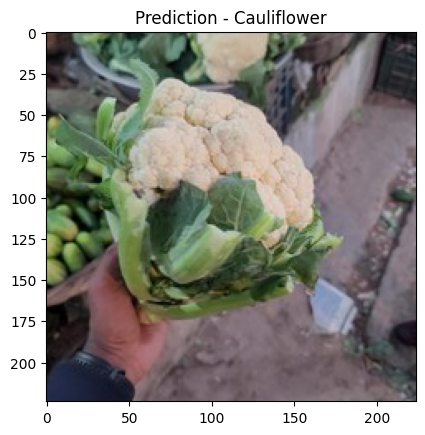

In [44]:
predict_image(os.path.join(test_data,'Cauliflower/1064.jpg'),model)

1/1 [==============================] - 0s 28ms/step


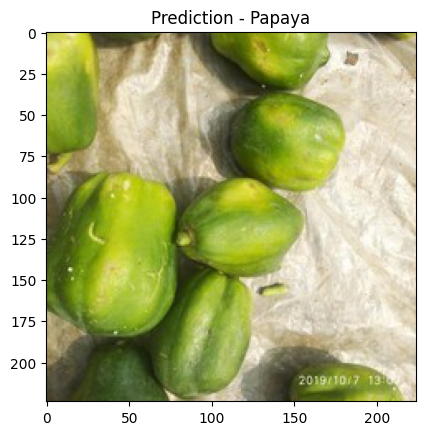

In [49]:
predict_image(os.path.join(test_data,'Papaya/1254.jpg'),model)

1/1 [==============================] - 0s 28ms/step


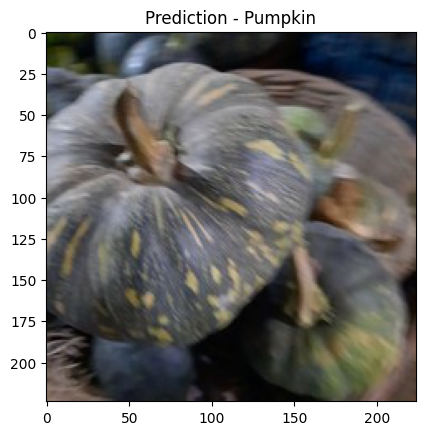

In [51]:
predict_image(os.path.join(test_data,'Pumpkin/1054.jpg'),model)